# NumPy

**NumPy** - Библиотека для работы с многомерными массивами, например векторами и матрицами.

## Создание массивов

Самый простой вариант - из привычных списков

In [1]:
import numpy as np

a = np.array([1, 2, 3])
print(a)
print(type(a), type([1, 2, 3]))

[1 2 3]
<class 'numpy.ndarray'> <class 'list'>


Создадим теперь двумерный массив - матрицу:

In [3]:
a = np.array([[1, 2], [3, 4]])
print(a)

[[1 2]
 [3 4]]


Для удобства, можно использовать вот такую функцию для красивого отображения матриц в Jupyter:

In [24]:
import IPython.display

def show(mat):
    tex = r'\begin{pmatrix}' + r'\\'.join('&'.join(map(str, row)) for row in mat) + r'\end{pmatrix}'
    IPython.display.display(IPython.display.Math(tex))
    print(tex)

show(a)

<IPython.core.display.Math object>

\begin{pmatrix}1&2\\3&4\end{pmatrix}


Еще несколько способов создания стандартных массивов:

In [4]:
np.repeat(15, 5) # Массив полученные повторением исходного объекта

array([15, 15, 15, 15, 15])

In [5]:
show(np.zeros((3, 3))) # Массив из нулей

<IPython.core.display.Math object>

In [6]:
show(np.ones((3, 1))) # Массив из единиц

<IPython.core.display.Math object>

In [7]:
show(np.eye(3)) # Единичная матрица

<IPython.core.display.Math object>

В отличае от списков (`list`), массивы **NumPy** всегда состоят из однотипных элементов.
При создании массивов можно явно указать тип эелементов. При этом в **NumPy** свои типы, например `numpy.int32`, `numpy.int64`, `numpy.float64`. Впрочем, можно указывать и стандартные типы, которые будут отображены в `numpy` типы. Например:

In [8]:
a = np.eye(3, dtype=int)
print(a.dtype)
print(type(a[0][0]))
show(a)

int64
<class 'numpy.int64'>


<IPython.core.display.Math object>

In [9]:
np.array([1, 2, 5], np.float64)

array([1., 2., 5.])

Или даже

In [10]:
np.array(input().split(), float)

1 2 3 4


array([1., 2., 3., 4.])

## Операции над массивами

В **NumPy** нам доступны все стандартные математические операции над массивами - от суммы векторов до произведения матриц.

Умножение на число:

In [11]:
a = np.array([1, 2, 3])
a * 2

array([2, 4, 6])

Сравните с тем, как работает эта операция со стандартными списками:

In [12]:
[1, 2, 3] * 2

[1, 2, 3, 1, 2, 3]

Аналогично работает и деление на число, а также и остальные арифметические операции массива с числом - поэлементно.
Также естественно работает сложение векторов:

In [13]:
np.array([1, 2, 3]) + np.array([3, 2, 1])

array([4, 4, 4])

Однако, умножение оператором `*` не является ни скалярным, ни векторным произведением. Напротив, `*` работает также как и `+` и все остальные арифметичекие операторы - поэлементно:

In [14]:
np.array([1, 2, 3]) * np.array([2, 2, 1])

array([2, 4, 3])

Для вычисления скалярного произведения есть метод `.dot()` у массивов, например `a.dot(b)`. Векторное произведенией записывается как `np.cross(a, b)`, а длину вектора можно вычислить как `np.linalg.norm(a)`.
Итак, теперь вы во всеоружии, пришло время размяться:

### Упражнение 1

На плоскости расположено несколько маленьких шариков разных масс. Пользователь задает их координаты (на плоскости) и массы. Выведите координты центра масс всей системы. Формат ввода организуйте на свой вкус.

In [23]:
R=[np.array([0,0,0]),np.array([6,6,6])]
M=[10,5]
C=sum( m*r for m,r in zip(M,R))
C=C/sum(M)
print(C)

[2. 2. 2.]


### Упражнение 2

Свет падает на плоскость в направлении заданным вектором L (в 3-мерном пространстве). Сама плоскость задана тремя точками A, B и C, через которые она проходит. Найдите вектор отраженного света. Пользователь вводит L, A, B и C, в виде троек чисел - координат через пробел, каждый вектор в новой строке.

In [35]:
def showvec(mat):
    tex = r'\begin{pmatrix}' + r'\\'.join(str(row) for row in mat) + r'\end{pmatrix}'
    IPython.display.display(IPython.display.Math(tex))
    
#def psevdodet(P,x,y):
#    return np.linalg.det(np.array(([P[1][x]-P[0][x],P[1][y]-P[0][y]],[P[2][x]-P[0][x],P[2][y]-P[0][y]])))

def normal(P): #np.cross(a, b)
    #_NORM=np.array([psevdodet(P,1,2),-psevdodet(P,0,2),psevdodet(P,0,1)])#[np.linalg.det(np.array(([P[1][1]-P[0][1],P[1][2]-P[0][2]],[P[2][1]-P[0][1],P[2][2]-P[0][2]]))),-1*np.linalg.det(np.array(([P[1][0]-P[0][0],P[1][2]-P[0][2]],[P[2][0]-P[0][0],P[2][2]-P[0][2]]))), np.linalg.det(np.array(([P[1][0]-P[0][0],P[1][1]-P[0][1]],[P[2][0]-P[0][0],P[2][1]-P[0][1]])))] )
    _LENG=np.linalg.norm(_NORM)
    for i in range(3):
        _NORM[i]/=_LENG
    return _NORM

L=np.array(input().split(), float)
abc=np.array((np.array(input().split(), float),np.array(input().split(), float),np.array(input().split(), float)))#np.array((np.array(input().split(), float),np.array(input().split(), float),np.array(input().split(), float)))
n=normal(abc)
L1=L-2*(n.dot(L)*n);
#normComp=n.dot(L)*n;
#tangComp=L-normComp
#normComp=-normComp
#L1=normComp+tangComp
showvec(L1)

0 0 1
9 8 4
8 2 4
1 6 4


<IPython.core.display.Math object>

## Также, **NumPy** предоставляет нам привычные оперции над матрицами:
- `np.linalg.det(a)` - определитель матрицы `a`
- `a.T` - транспонированная матрица
- `np.matmul(a, b)` - произведение матриц

In [40]:
a = np.array([[1, 2], [3, 4]])
show(a)
b = a.T
show(b)
b[1][0] = 10
show(b)
show(a)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Обратите внимание, при изменении элемента `b`, матрица `a` тоже изменилась. Это потому, что `a.T` не создает новой матрицы, а лишь предоставляет доступ к имеющимся данным "по-другому".

### Упражнение 3

Пользователь вводит две квадратные матрицы 3x3. Посчитайте их произведение без использования numpy. Затем с помощью `np.matmul()`. Выведите оба результата.

In [14]:
A=np.array([np.array(input().split(), float) for _ in range(3)])
#A=np.array((np.array(input().split(), float),np.array(input().split(), float),np.array(input().split(), float)))
B=np.array((np.array(input().split(), float),np.array(input().split(), float),np.array(input().split(), float)))
C=np.zeros((3,3))
for i in range(3):
    for j in range(3):
        for k in range(3):
            C[i][j]+=A[i][k]*B[k][j]
show(C)
show(np.matmul(A,B))

1 2 3
2 3 4
3 4 5
5 6 7
6 7 8
7 8 9


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Matplotlib

Построение графика по точкам:

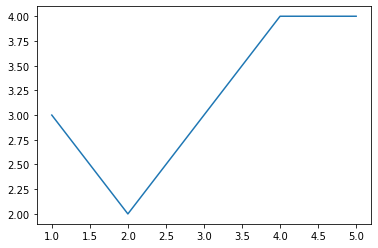

In [37]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [3, 2, 3, 4, 4])
plt.show()

Что ж, построим что-нибудь поинтереснее. Для этого нам понадобятся две новые фишки `numpy`:
`np.linspace(a, b, n)` - создает возрастающий массив чисел от `a` до `b` через равные промежутки из `n` элементов - то что нам нужно для оси X.
`np.vectorize(f)` - создает новую функцию, которая умеет преобразовывать вектор целиком, применяя к каждому элементу функцию `f`.

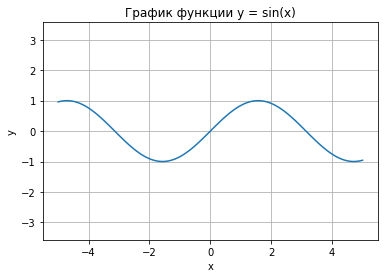

In [50]:
import math
x = np.linspace(-5, 5, 100)
y = np.vectorize(math.sin)(x)

# Заодно, добавим некоторые дополнительные элементы:
plt.title('График функции y = sin(x)')  # заголовок
plt.xlabel('x')  # ось абсцисс
plt.ylabel('y')  # ось ординат
plt.grid() # включение отображение сетки
plt.axis('equal') # выровнять масштаб по осям (попробуйте закомментировать)

plt.plot(x, y)
plt.show()

### Упражнение 4

С помощью matplotlib нарисуйте график функции $y(x) = 10x^3 + 2x^2 - x$

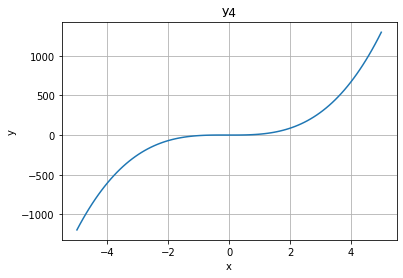

In [40]:
def y4(x):
    return 10*x**3+2*x**2-x
x = np.linspace(-5, 5, 100)
y=np.vectorize(y4)(x)
plt.xlabel('x')  # ось абсцисс
plt.ylabel('y')  # ось ординат
plt.grid() # включение отображение сетки
plt.title("У4")
plt.plot(x, y)
plt.show()

### Упражнение 5
С помощью matplotlib нарисуйте спираль

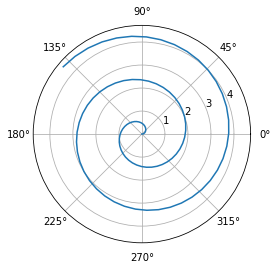

In [85]:
def rr5(x):
    return 0.3*x

fi = np.linspace(0, 15, 100)
rad=np.vectorize(rr5)(fi)
plt.subplot(projection='polar').plot(fi, rad)


### Точечная диаграмма
Познакомимся с двумя новыми функциями:

`numpy.random.rand(n)` - случайный вектор из `n` элементов

`matplotlib.pyplot.scatter(x, y, ...)` - рисуем точки, точнее круги. Некоторые аргументы:

   - `x` - массив x-координат
   - `y` - массив y-координат
   - `s` - массив площадей кругов
   - `c` - массив цветов
   - `alpha` - степень прозрачности кругов

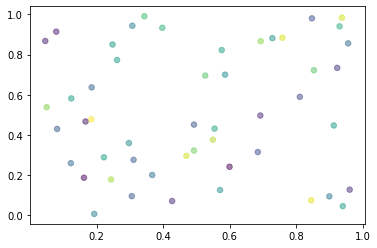

In [63]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
sq = 30#(30 * np.random.rand(n)) ** 2

plt.scatter(x, y, s=sq, c=colors, alpha=0.5)
plt.show()

### Упражнение 6
В Python можно легко работать с комплексными числами. Например, число $1+2i$ записывается как `1 + 2j`, или `complex(1, 2)`. Действительную часть комплексного числа можно получить как `x.real`, а комплексную - `x.imag`. Постройте на плоскости последовательность точек, заданную рекурсивной формулой $z_{n+1} = z_n^2 + c$ где $c$ - некоторая комплексная константа (пусть ее задает пользователь) а $z_0 = 0$. Точки плоскости $c$, для которых данная последовательность ограничена, образуют известный фрактал - [множество Мандельброта](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0).

ValueError: 0.0 is not a valid value for color

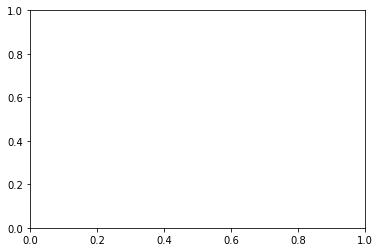

In [69]:
def mod(q):
    return (q.real**2+q.imag**2)**0.5
for i in np.linspace(-12, 3, 150):
    for j in np.linspace(-6,6,120):
        n = 1000#int(input())
        c=i/10+j/10*1j#-0.5+0.5j#complex(input())
        z=[complex(0,0)]       
        sq=np.repeat(0.5,n-1)
        clr=0
        bl= True
        for k in range(n):
            if(mod(z[-1])>2):
                z.append(z[k])
                if(bl):
                    bl=False
                    clr=1-k/n;
            else:
                z.append(z[k]*z[k]+c)            
        #colors = np.random.rand(n)#
        colors = np.repeat(clr,n)
        #if z[-1].real<1000:
        #plt.scatter(np.array([q.real for q in z]), np.array([q.imag for q in z]),c=colors)#, sq, colors, alpha=0.5)
        #plt.show()
        for h in range(n):
            plt.plot(z[h].real, z[h].imag, marker='o', ls='', c=float(colors[h]), markersize=5)

In [ ]:
"""""n=np.array(np.linalg.det(np.array(([P[1][1]-P[0][1],P[1][2]-P[0][2]],[P[2][1]-P[0][1],P[2][2]-P[0][2]]))) ,
        -1*np.linalg.det(np.array(([P[1][0]-P[0][0],P[1][2]-P[0][2]],[P[2][0]-P[0][0],P[2][2]-P[0][2]]))) ,
           np.linalg.det(np.array(([P[1][0]-P[0][0],P[1][1]-P[0][1]],[P[2][0]-P[0][0],P[2][1]-P[0][1]]))) )""""